# Premier League Bet365 Forecasting Analysis

The Premier League is the #1 football (soccer) league in the world. Bet365 is one of the biggest gambling companies in Europe, and offers Premier League game betting for every match. 

Even though I do not personally gamble, I do love football and stats. I decided to pull some data with historical match information along with betting odds for each game. Ultimately I wanted to determine what factors lead to less accurate results. 


# Summary

My process was as follows: 

Step 1- I input the datasets which were separated by season. I merged these files, and cleaned up the additional information I wouldn't need. 

Step 2- I then broke it down by referee to explore if there was any useful relationship in average game stats when grouped by referee. I also checked if any of these stats correlated with how often a referee was selected to officiate (i.e. a referee who favors higher-scores is selected more often, or a ref that books players less is selected more). Ultimately, this was not the case. 

Step 3- I then added a column marking what results were upsets. Using this, I then plotted upset percentages when playing home, and the same for when playing away. This information, as can be seen below, can be utilized to better find what teams/situations Bet 365's models struggle with the most. For example, the model is much more accurate when predicting home games for top team, but struggles with lower table teams. For away games, the same pattern is not present. 

Step 4- I calculated upset percentages grouped by referee. Despite the result of step 2, this one did provide useful insights. The top referee by upset %, Mike Dean, is infamous for questionable calls and chaotic games. His percentage stood out from the average consensus, demonstrating that a referee can influence the results and impact the model's accuracy. Bet 365 would be wise to identify these repeat "offenders" to determine ways to minimize losses from upsets in games officiated by these referees. 

Step 5- Lastly, I calculated upset percentages by month. January's upset percentage stood out, and is something that Bet 365 can delve into deeper to determine why. Some possible explanations could be season fatigue, higher injuries, or a packed game calendar (particularly for teams that have made it far in the domestic cup or European competitions). 



# 1. Dataset Input

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

# Read data for the last five seasons
season_1819 = pd.read_csv('201819.csv')
season_1920 = pd.read_csv('201920.csv')
season_2021 = pd.read_csv('202021.csv')
season_2122 = pd.read_csv('202122.csv')
season_2223 = pd.read_csv('202223.csv')

In [2]:
print(season_2223.head())

  Div        Date   Time        HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  05/08/2022  20:00  Crystal Palace        Arsenal     0     2   A     0   
1  E0  06/08/2022  12:30          Fulham      Liverpool     2     2   D     1   
2  E0  06/08/2022  15:00     Bournemouth    Aston Villa     2     0   H     1   
3  E0  06/08/2022  15:00           Leeds         Wolves     2     1   H     1   
4  E0  06/08/2022  15:00       Newcastle  Nott'm Forest     2     0   H     0   

   HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  \
0     1  ...     1.76  0.50      2.09      1.84   2.04   1.88     2.09   
1     0  ...     2.73  1.75      1.90      2.03   1.91   2.02     2.01   
2     0  ...     1.76  0.50      1.93      2.00   1.93   2.00     1.94   
3     1  ...     1.87 -0.25      2.08      1.85   2.10   1.84     2.14   
4     0  ...     1.89 -1.00      1.97      1.96   1.99   1.93     2.19   

   MaxCAHA  AvgCAHH  AvgCAHA  
0     1.88     2.03     1.85  
1     

Combining files into a single file to be properly analyzed

In [3]:
# print(season_1920.columns)
# print(season_1819.columns)

# Selecting ONLY the columns we might need. 

columns = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA']
season_1819 = pd.read_csv('201819.csv') [columns]
season_1920 = pd.read_csv('201920.csv')[columns]
season_2021 = pd.read_csv('202021.csv')[columns]
season_2122 = pd.read_csv('202122.csv')[columns]
season_2223 = pd.read_csv('202223.csv')[columns]

In [4]:

print("PRE-MERGE \n", season_1819.head())
dfs=[season_1819, season_1920, season_2021, season_2122, season_2223]
df = pd.concat(dfs, ignore_index=True)

print("_________________________________\nMERGED DATA\n")
print(df.head(), df.tail())

PRE-MERGE 
   Div        Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  10/08/2018    Man United       Leicester     2     1   H     1     0   
1  E0  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   
2  E0  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   
3  E0  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   
4  E0  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   

  HTR  ... HY  AY  HR  AR  B365H  B365D  B365A   BWH  BWD   BWA  
0   H  ...  2   1   0   0   1.57    3.9   7.50  1.53  4.0  7.50  
1   H  ...  1   1   0   0   1.90    3.6   4.50  1.90  3.4  4.40  
2   A  ...  1   2   0   0   2.50    3.4   3.00  2.45  3.3  2.95  
3   A  ...  2   1   0   0   6.50    4.0   1.61  6.25  3.9  1.57  
4   A  ...  2   2   0   0   3.90    3.5   2.04  3.80  3.5  2.00  

[5 rows x 29 columns]
_________________________________
MERGED DATA

  Div        Date      HomeTeam        AwayTeam

In [5]:
#Removing Div, all games were in the Premier League (top division)
df= df.drop('Div', axis=1)
print(df.head())

         Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  10/08/2018    Man United       Leicester     2     1   H     1     0   H   
1  11/08/2018   Bournemouth         Cardiff     2     0   H     1     0   H   
2  11/08/2018        Fulham  Crystal Palace     0     2   A     0     1   A   
3  11/08/2018  Huddersfield         Chelsea     0     3   A     0     2   A   
4  11/08/2018     Newcastle       Tottenham     1     2   A     1     2   A   

      Referee  ...  HY  AY  HR  AR  B365H  B365D  B365A   BWH  BWD   BWA  
0  A Marriner  ...   2   1   0   0   1.57    3.9   7.50  1.53  4.0  7.50  
1    K Friend  ...   1   1   0   0   1.90    3.6   4.50  1.90  3.4  4.40  
2      M Dean  ...   1   2   0   0   2.50    3.4   3.00  2.45  3.3  2.95  
3  C Kavanagh  ...   2   1   0   0   6.50    4.0   1.61  6.25  3.9  1.57  
4  M Atkinson  ...   2   2   0   0   3.90    3.5   2.04  3.80  3.5  2.00  

[5 rows x 28 columns]


In [6]:
display(df)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,2,1,0,0,1.57,3.90,7.50,1.53,4.0,7.50
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,1,1,0,0,1.90,3.60,4.50,1.90,3.4,4.40
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,1,2,0,0,2.50,3.40,3.00,2.45,3.3,2.95
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,2,1,0,0,6.50,4.00,1.61,6.25,3.9,1.57
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,2,2,0,0,3.90,3.50,2.04,3.80,3.5,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,28/05/2023,Everton,Bournemouth,1,0,H,0,0,D,S Attwell,...,1,3,0,0,1.50,4.50,6.50,1.47,4.5,6.50
1896,28/05/2023,Leeds,Tottenham,1,4,A,0,1,A,A Taylor,...,3,0,0,0,2.75,3.80,2.30,2.70,3.7,2.37
1897,28/05/2023,Leicester,West Ham,2,1,H,1,0,H,S Hooper,...,1,1,0,0,1.91,3.80,3.60,1.95,3.8,3.50
1898,28/05/2023,Man United,Fulham,2,1,H,1,1,D,R Jones,...,1,2,0,0,1.50,4.33,6.00,1.51,4.6,5.75


# 2. Analyzing Game Stats By Referee

In [7]:
print(df.columns)

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA'],
      dtype='object')


In [8]:
referee_stats = df.groupby('Referee').agg({'FTHG': 'mean', 'FTAG': 'mean', 'HY': 'mean', 'AY': 'mean', 'HR': 'mean', 'AR': 'mean', 'Date': 'count'}).reset_index()
referee_stats.columns = ['Referee', 'AvgGoalsHome', 'AvgGoalsAway', 'AvgHomeYellowCards', 'AvgAwayYellowCards', 'AvgHomeRedCards', 'AvgAwayRedCards', 'GamesPlayed']  
referee_stats = referee_stats.sort_values(by='GamesPlayed', ascending=False).reset_index()

#SAVING TOP 20 referees for future reference
top20refs= df['Referee'][0:20]
# print(top20refs)


display(referee_stats)

,index,Referee,AvgGoalsHome,AvgGoalsAway,AvgHomeYellowCards,AvgAwayYellowCards,AvgHomeRedCards,AvgAwayRedCards,GamesPlayed
0,3,A Taylor,1.573333,1.306667,1.773333,1.640000,0.066667,0.046667,150
1,19,M Oliver,1.616438,1.493151,1.506849,1.445205,0.047945,0.075342,146
2,23,P Tierney,1.503937,1.385827,1.740157,1.850394,0.062992,0.047244,127
3,5,C Pawson,1.277311,1.336134,1.899160,1.806723,0.033613,0.092437,119
4,17,M Atkinson,1.353982,1.203540,1.256637,1.469027,0.026549,0.061947,113
5,27,S Attwell,1.770642,1.146789,1.678899,1.899083,0.018349,0.091743,109
6,1,A Marriner,1.351852,1.555556,1.277778,1.481481,0.064815,0.027778,108
7,18,M Dean,1.467290,1.102804,1.962617,1.869159,0.065421,0.140187,107
8,4,C Kavanagh,1.446602,1.271845,1.446602,1.747573,0.058252,0.019417,103
9,12,J Moss,1.663366,1.326733,1.504950,1.495050,0.039604,0.089109,101


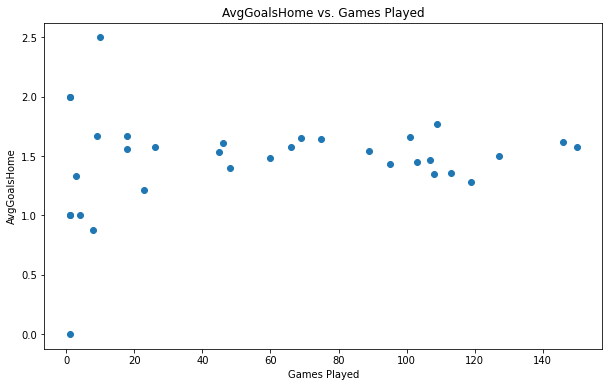

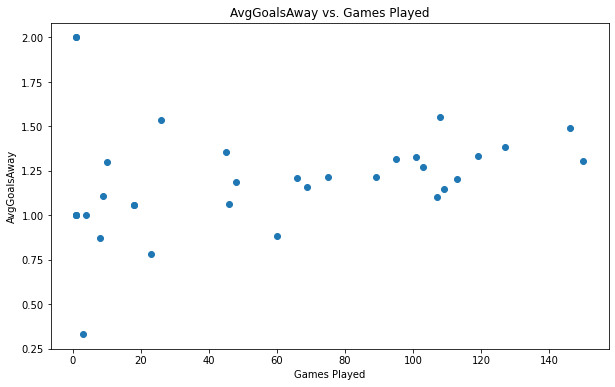

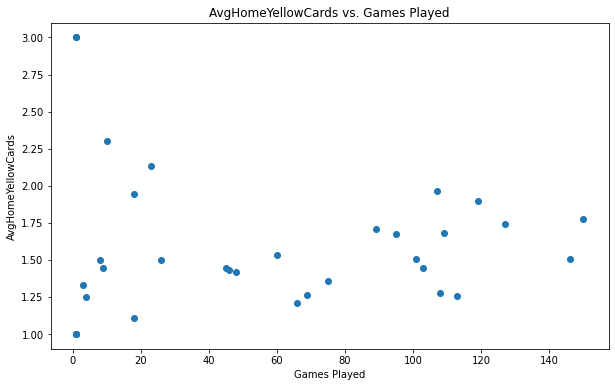

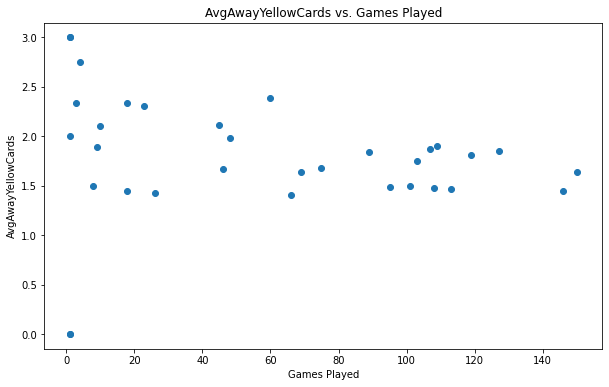

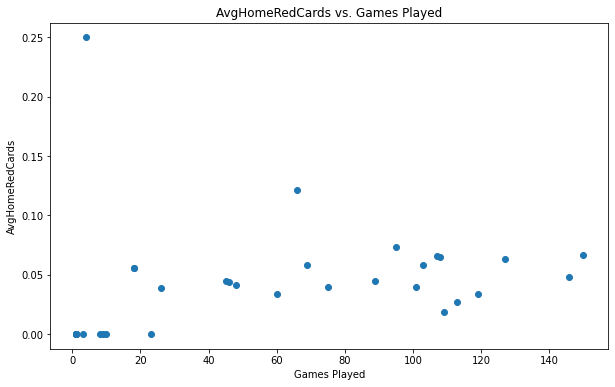

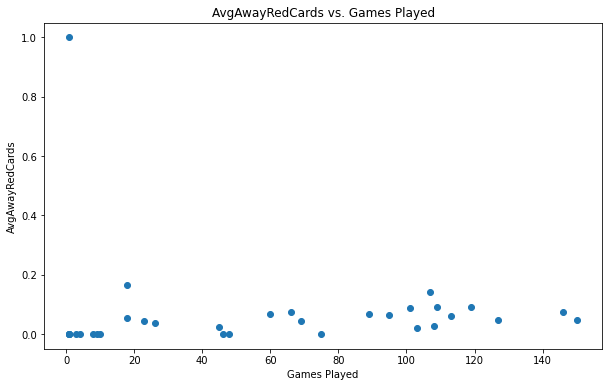

In [9]:
import matplotlib.pyplot as plt

columns_to_plot = ['AvgGoalsHome', 'AvgGoalsAway', 'AvgHomeYellowCards', 'AvgAwayYellowCards', 'AvgHomeRedCards', 'AvgAwayRedCards']
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(referee_stats['GamesPlayed'], referee_stats[column])
    plt.title(f'{column} vs. Games Played')
    plt.xlabel('Games Played')
    plt.ylabel(column)
    plt.show()


In [10]:
referee_result_stats = df.groupby('Referee')['FTR'].value_counts(normalize=True).unstack().reset_index()

referee_result_stats = pd.merge(referee_result_stats, referee_stats)
referee_result_stats = referee_result_stats[['Referee','A', 'D', 'H', 'GamesPlayed']]
referee_result_stats = referee_result_stats[referee_result_stats['GamesPlayed']>40]
referee_result_stats = referee_result_stats.sort_values(by='GamesPlayed', ascending=False).reset_index(drop=True)
                                           
print(referee_result_stats)

       Referee         A         D         H  GamesPlayed
0     A Taylor  0.313333  0.226667  0.460000          150
1     M Oliver  0.390411  0.178082  0.431507          146
2    P Tierney  0.377953  0.212598  0.409449          127
3     C Pawson  0.420168  0.201681  0.378151          119
4   M Atkinson  0.371681  0.203540  0.424779          113
5    S Attwell  0.293578  0.211009  0.495413          109
6   A Marriner  0.388889  0.268519  0.342593          108
7       M Dean  0.308411  0.261682  0.429907          107
8   C Kavanagh  0.330097  0.203883  0.466019          103
9       J Moss  0.316832  0.158416  0.524752          101
10    K Friend  0.368421  0.200000  0.431579           95
11     D Coote  0.337079  0.213483  0.449438           89
12    S Hooper  0.293333  0.253333  0.453333           75
13    A Madley  0.289855  0.246377  0.463768           69
14     G Scott  0.303030  0.181818  0.515152           66
15    P Bankes  0.216667  0.283333  0.500000           60
16     R Jones

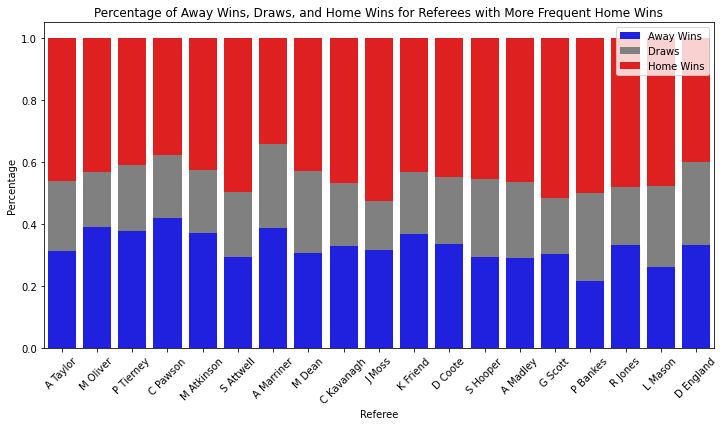

In [11]:
# Plot the percentage of away wins, draws, and home wins for referees with more frequent home wins
plt.figure(figsize=(12, 6))
sns.barplot(x='Referee', y='A', data=referee_result_stats, label='Away Wins', color='blue', order=referee_result_stats['Referee'])
sns.barplot(x='Referee', y='D', data=referee_result_stats, label='Draws', color='gray', bottom=referee_result_stats['A'], order=referee_result_stats['Referee'])
sns.barplot(x='Referee', y='H', data=referee_result_stats, label='Home Wins', color='red', bottom=referee_result_stats['A'] + referee_result_stats['D'], order=referee_result_stats['Referee'])
plt.title('Percentage of Away Wins, Draws, and Home Wins for Referees with More Frequent Home Wins')
plt.xlabel('Referee')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Ultimately, the analysis by referee did not provide any clear pattern when analyzing game statistics by referee. This analysis was performed to inform the rest of the analysis, as well to determine if there is any favor by the Premier League for referees that tend to favor certain factors such as more red cards, more goals, home wins, etc. 

# 3. Analyzing Upset Percentages By Team

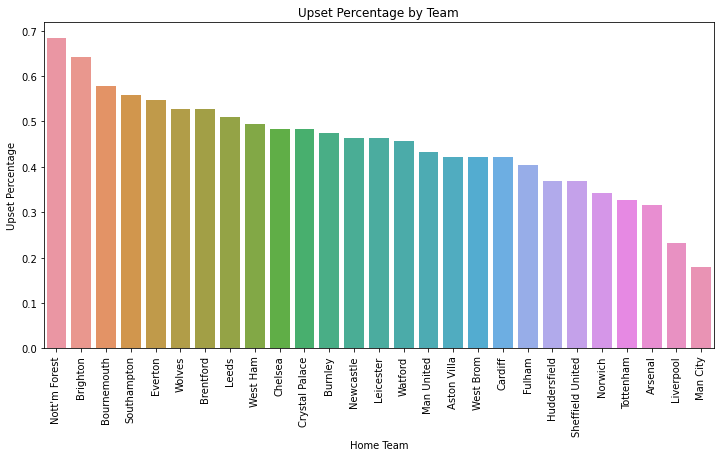

In [12]:
df['PredictedResult'] = df[['B365H', 'B365D', 'B365A']].idxmin(axis=1).apply(lambda x: x[-1])

# Define a function to determine if a match is an upset
def is_upset(row):
    return row['FTR'] != row['PredictedResult']

# Apply the function to create an 'Upset' column
df['Upset'] = df.apply(is_upset, axis=1)

# Group by each team and calculate the percentage of upsets
team_upset_stats = df.groupby('HomeTeam')['Upset'].mean().reset_index()
team_upset_stats.columns = ['Team', 'UpsetPercentage']

# Sort teams by upset percentage
team_upset_stats_sorted = team_upset_stats.sort_values(by='UpsetPercentage', ascending=False)

# Plot the upset percentage for each team
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='UpsetPercentage', data=team_upset_stats_sorted)
plt.title('Upset Percentage by Team')
plt.xlabel('Home Team')
plt.ylabel('Upset Percentage')
plt.xticks(rotation=90)
plt.show()

Bet 365's modeling seems to better be able to predict results for home team results for teams frequently at the top of the table (i.e. Man City, Liverpool, Arsenal, Tottenham). The highest percentage of upsets seems to be from games that are from the bottom of the table and have even been relegated in recent seasons, such as Nottingham forest, Brighton, and Bournemouth.

An interesting way to think about this is thinking of top teams as you would think of investment grade companies in finance. They are the best around and are much more predictable. Bottom of the table teams can be seen as the opposite, and more volatile. It makes sense that Nottingham Forest has more upsets than Manchester City, but I think it's a considerable red flag that they have such a high upset percentage. A potential solution could be adapting the predictions based on historical upset percentages by team.

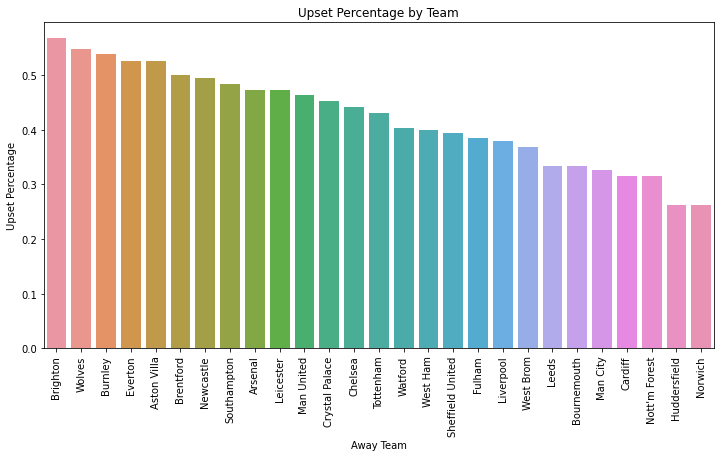

In [13]:
# Group by each team and calculate the percentage of upsets
team_upset_stats = df.groupby('AwayTeam')['Upset'].mean().reset_index()
team_upset_stats.columns = ['Team', 'UpsetPercentage']

# Sort teams by upset percentage
team_upset_stats_sorted = team_upset_stats.sort_values(by='UpsetPercentage', ascending=False)

# Plot the upset percentage for each team
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='UpsetPercentage', data=team_upset_stats_sorted)
plt.title('Upset Percentage by Team')
plt.xlabel('Away Team')
plt.ylabel('Upset Percentage')
plt.xticks(rotation=90)
plt.show()

The top of the table vs bottom of the table dichotomy observed in the previous visualization is not present here. This is a good indicator that the model is better at predicting away performances of teams. The highest upset percentage here is also lower. Once again, these percentages could be factored into the model to better determine odds/payouts in the future. 

# 4. Upset Percentages by Referee

In [14]:
# display(df)

accuracy=len(df[df['Upset']==False])/len(df['Upset'])
print(f'Accuracy Overall: {accuracy:.2%}')

#I want to determine if there is a difference in accuracy when predicting
#a home win vs away win. 
home_win_df = df[df['PredictedResult'] == 'H']
away_win_df = df[df['PredictedResult'] == 'A']


accuracy_home_win = len(home_win_df[home_win_df['Upset'] == False]) / len(home_win_df)
accuracy_away_win = len(away_win_df[away_win_df['Upset'] == False]) / len(away_win_df)


print(f'Accuracy for Home Win: {accuracy_home_win:.2%}')
print(f'Accuracy for Away Win: {accuracy_away_win:.2%}')



Accuracy Overall: 55.47%
Accuracy for Home Win: 56.35%
Accuracy for Away Win: 53.98%


Based on this, it seems that betting accuracy is higher when dealing with home games. For the betting Company, this means that they can have higher confidence that their models in the long-run will better predict their wins/losses for home games. 

Nonetheless, this isn't a clearly significant difference. 

,Referee,UpsetPercentage
0,M Dean,0.523364
1,K Friend,0.484211
2,L Mason,0.456522
3,M Oliver,0.452055
4,S Attwell,0.449541
5,M Atkinson,0.442478
6,C Pawson,0.428571
7,A Taylor,0.426667
8,A Marriner,0.416667
9,C Kavanagh,0.407767


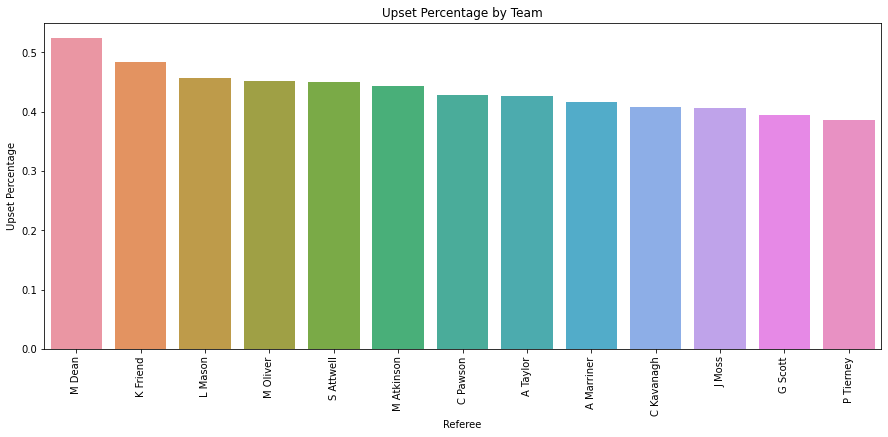

In [15]:
ref_upsets= df.groupby('Referee')['Upset'].mean().reset_index()
ref_upsets= ref_upsets[ref_upsets['Referee'].isin(list(top20refs))]
ref_upsets.columns = ['Referee', 'UpsetPercentage']

# Sort teams by upset percentage
ref_upsets = ref_upsets.sort_values(by='UpsetPercentage', ascending=False).reset_index(drop=True)
display(ref_upsets)
# Plot the upset percentage for each team
plt.figure(figsize=(15, 6))
sns.barplot(x='Referee', y='UpsetPercentage', data=ref_upsets)
plt.title('Upset Percentage by Team')
plt.xlabel('Referee')
plt.ylabel('Upset Percentage')
plt.xticks(rotation=90)
plt.show()

To the surprise of few premier league fans, Mike Dean is the referee with the highest percentage of upsets. Mike Dean has always been famous for some quite infamous decisions, questionable calls, and frankly chaotic games. With the percentage of upsets of most referees being in the 40-45% range, Mike Dean sits at 52%. 

Referees like Mike Dean can be an issue for betting odds when games can be more chaotic and less fair. Payouts for games officiated by referees with a higher rate of upsets should be revisited to take into account the higher risk/higher model error. 

# 5. Upset Percentages by Month

,Month,UpsetPercentage
0,6,0.538462
1,1,0.492386
2,10,0.481865
3,2,0.468900
4,8,0.462585
5,4,0.459596
6,7,0.439394
7,11,0.438710
8,5,0.428571
9,12,0.420849


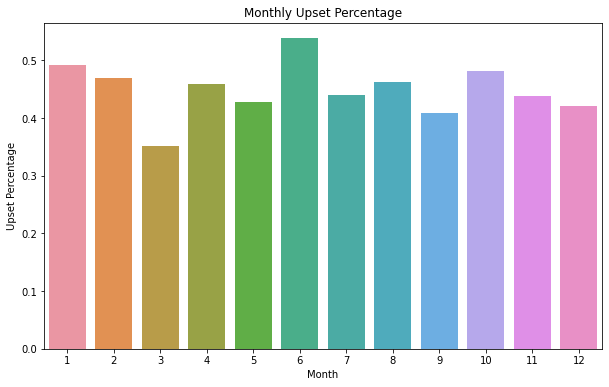

In [16]:
#to determine upsets/month, need to add a month column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', infer_datetime_format=True)
df['Month'] = df['Date'].dt.month

#Looking at upset percentage per month
monthly_upsets = df.groupby('Month')['Upset'].mean().reset_index()
monthly_upsets.columns = ['Month', 'UpsetPercentage']

# Sort months by upset percentage
monthly_upsets = monthly_upsets.sort_values(by='UpsetPercentage', ascending=False).reset_index(drop=True)
display(monthly_upsets)

# Plot the upset percentage for each month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='UpsetPercentage', data=monthly_upsets)
plt.title('Monthly Upset Percentage')
plt.xlabel('Month')
plt.ylabel('Upset Percentage')
plt.show() 

Based on this information, the highest percentage of monthly upsets happen in July, January, and June. July and June is typically offseason and may have an extremely limited number of games if any at all, so these aren't as relevant. 

The January percentage of upsets, however, is more indicative of a potential underlying cause for a higher likelihood of upsets. This may be due to something such as more accumulated injuries leading to several key players being out, or fatigue from the "better" teams who are also competing in European competitions, etc. Looking deeper into January predictions could be a place to improve predictive models. 